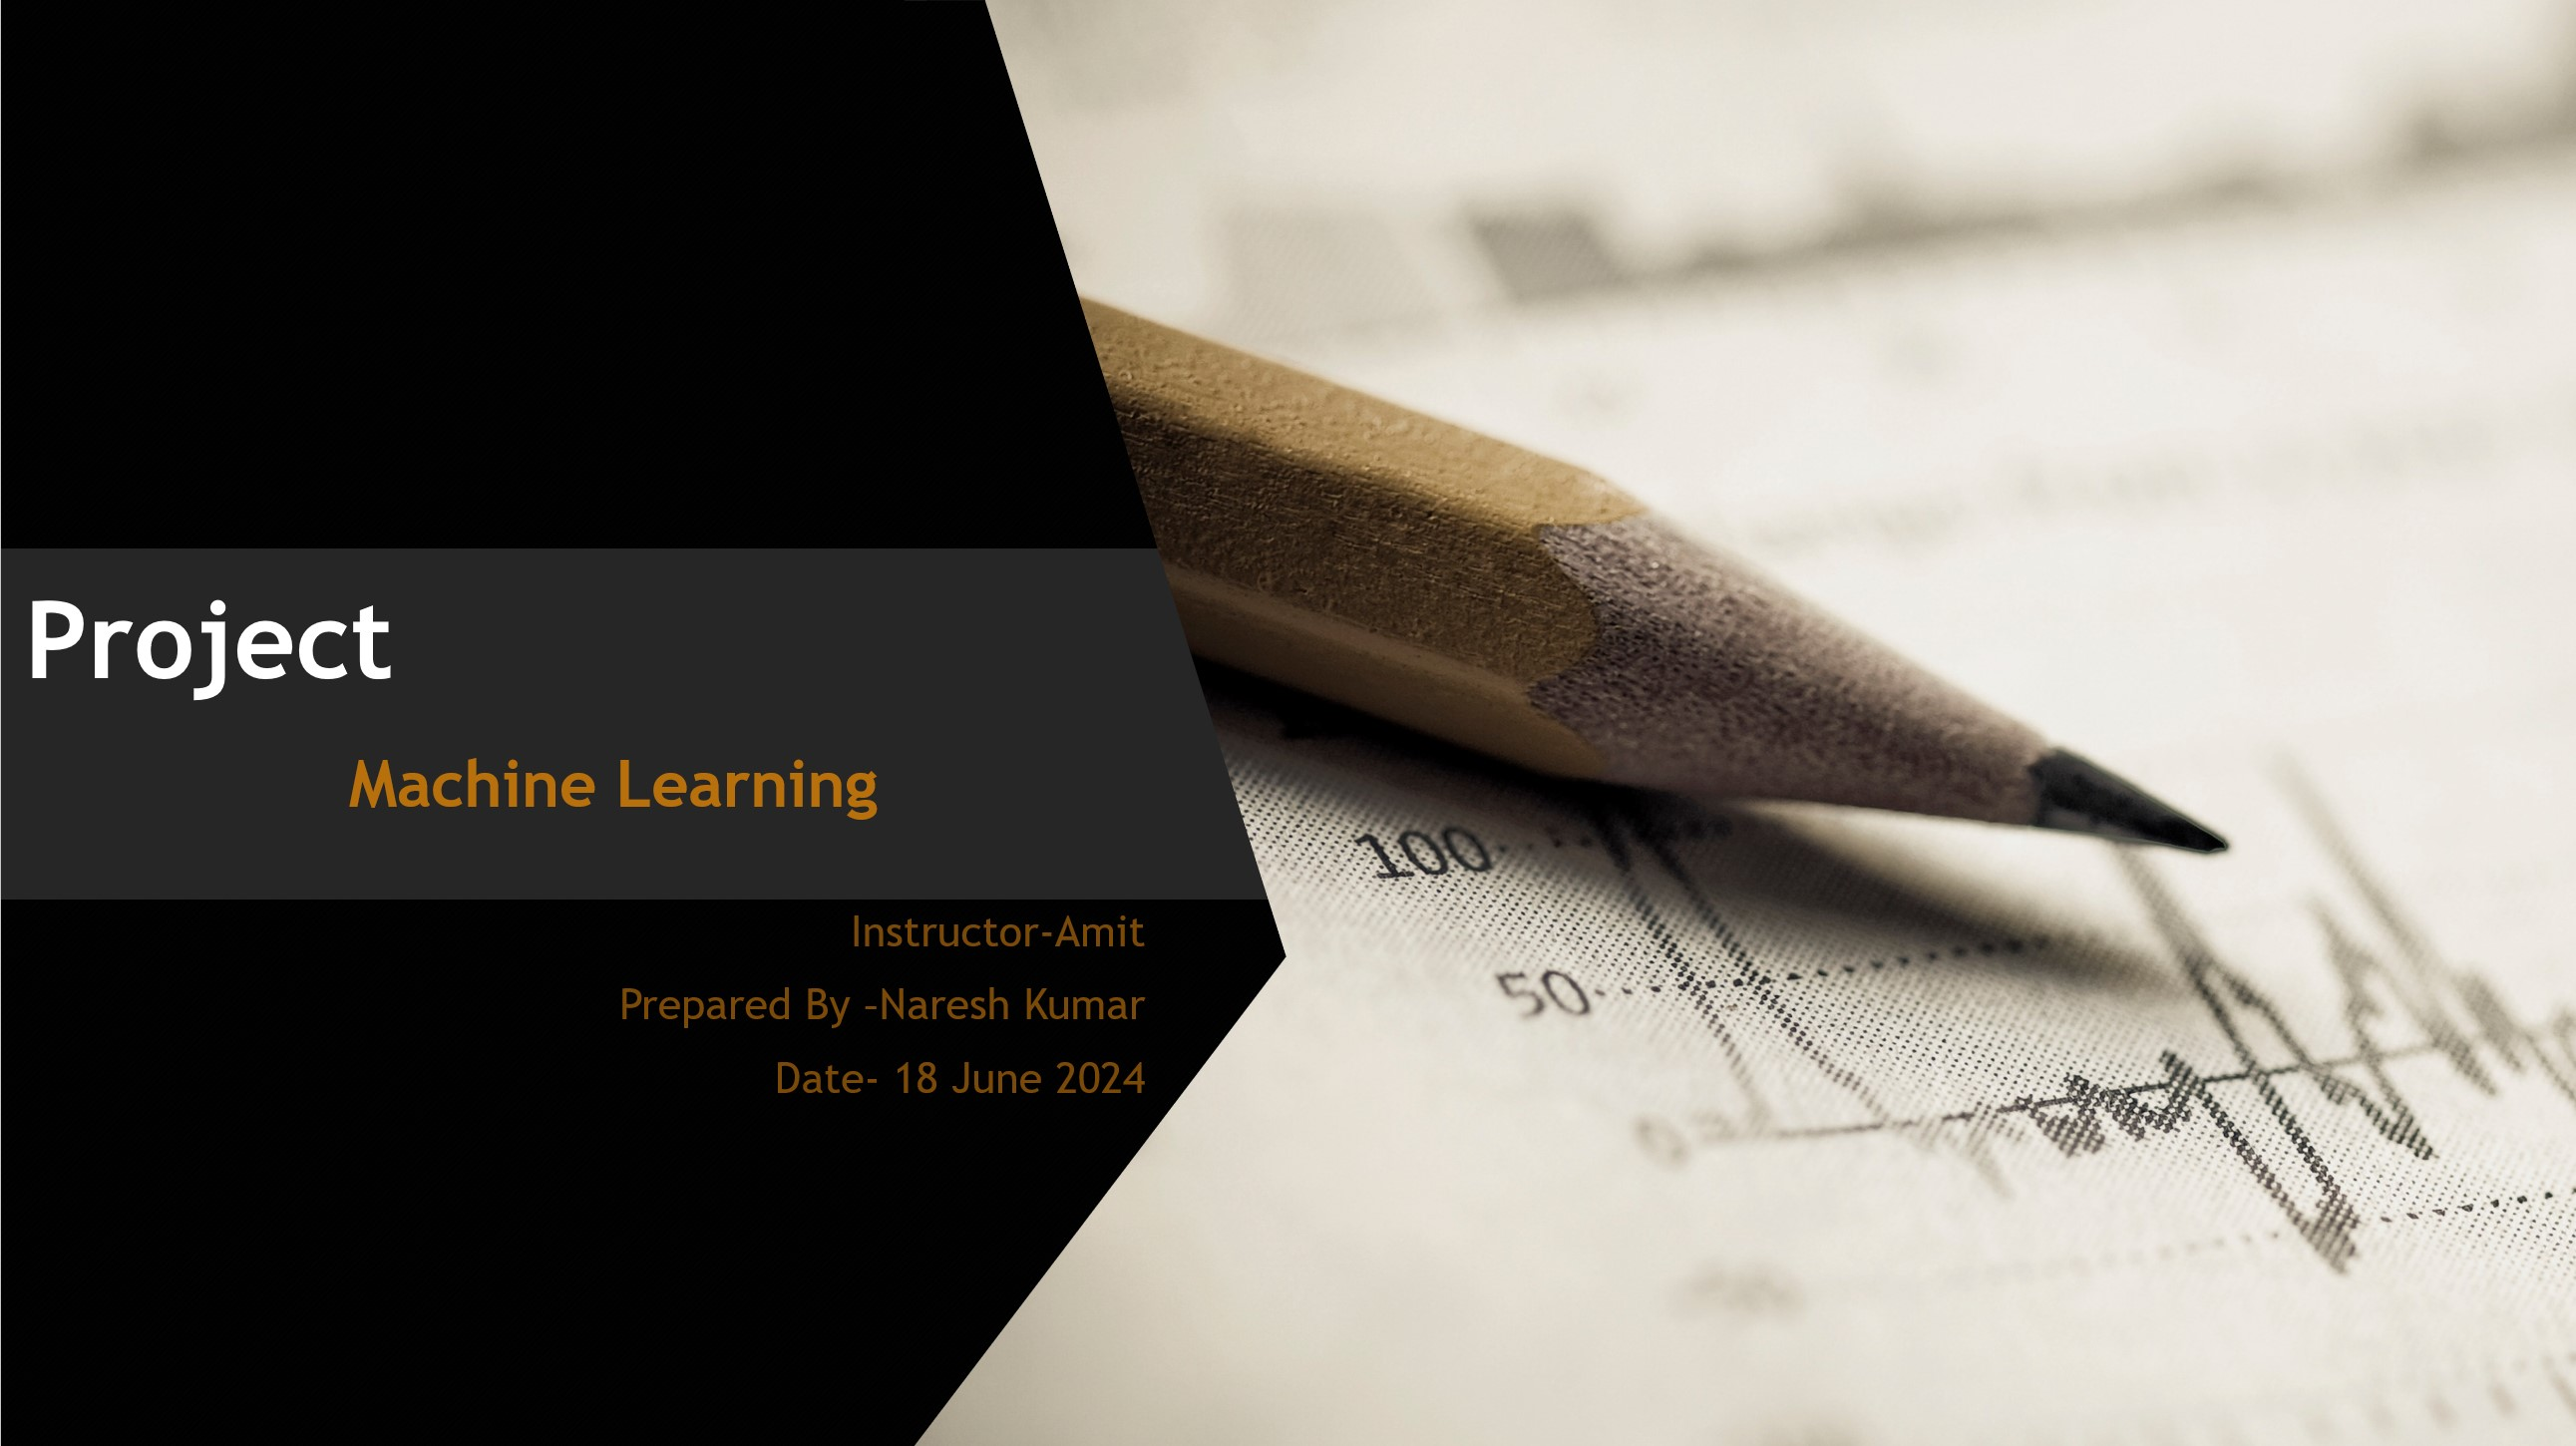

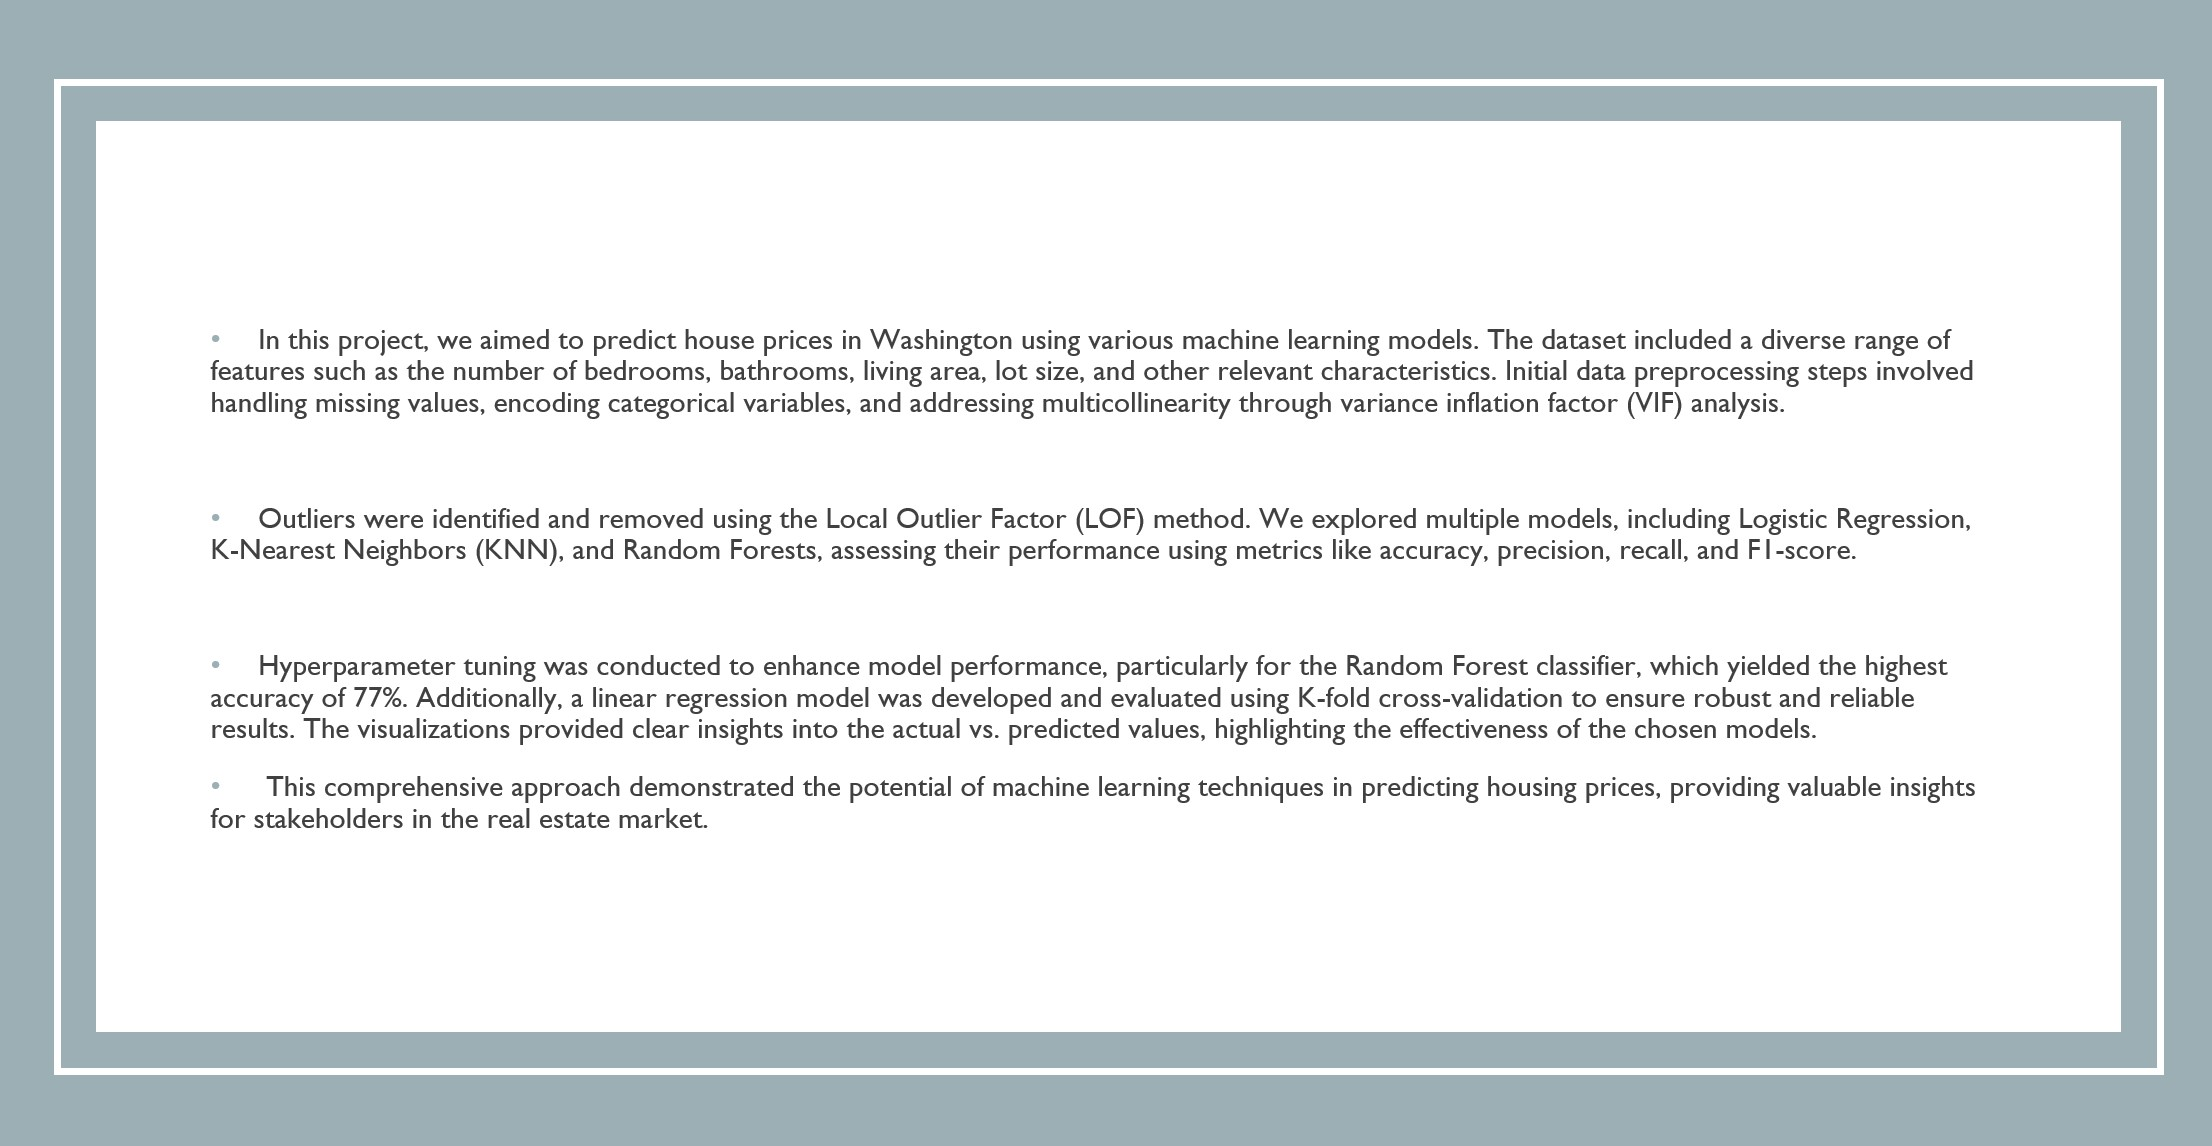

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [124]:
file_path = 'Washington_price_dataset.csv'
df = pd.read_csv(file_path)

In [90]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [173]:
# checking the column names 
df.columns 

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'month', 'city_encoded', 'price_category'],
      dtype='object')

In [91]:
#checking for numerical and categorical columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

we can see that  date column is of type object.converting this to a datetime type if date manipulations or comparisons are needed.



In [92]:
# Checking for null values(missing values)
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [93]:
# Identify and count duplicate records
duplicate_records = df.duplicated()
duplicate_count = duplicate_records.sum()
print(f"Number of duplicate records: {duplicate_count}")

Number of duplicate records: 0


In [67]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

There are four categorical variables in this dataset: street, city, statezip, and country. Since the country variable only contains a single unique value (USA), it will be dropped from the dataframe. The dataset includes 4476 different streets, 44 different cities, and 77 different state zip codes. The streets column will also be dropped because the state zip code and city variables already provide sufficient location information. Converting the streets into one-hot vectors would be computationally inefficient. Similarly, the state zip code variable will be dropped for the same reason. The remaining categorical variable, city, will be converted into one-hot vectors in the feature engineering section of this project. For the purposes of this project, the city provides sufficient geographical information for a machine learning model.

# Removing Irrelavant columns 

In [125]:
df.drop(columns=['street', 'country','statezip'], inplace=True)

In [126]:
# Converting date column to dtype
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)
df['date'].dtype

C:\Users\Nares\AppData\Local\Temp\ipykernel_880\762802495.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)


dtype('<M8[ns]')

In [127]:
# Adding year column
df['year'] = df.date.dt.year
# Checking for unique years
df.year.value_counts()
print('Years\n',df.year.value_counts())

# Adding month column
df['month'] = df.date.dt.month
# Checking for unique months
print('Months\n',df.month.value_counts())

# Dropping the year variable since all data is from 1 year 
df.drop(['date','year'], axis=1, inplace=True)

Years
 year
2014    4600
Name: count, dtype: int64
Months
 month
6    2179
5    1768
7     653
Name: count, dtype: int64


In [71]:
df.nunique()

price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
city               44
month               3
dtype: int64

In [72]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,month
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,5
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,5
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,5
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,5
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,5


In [73]:
df.shape

(4600, 15)

In [128]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the "city" column
le.fit(df['city'])

# Encode the "city" column and create a new column
df['city_encoded'] = le.transform(df['city'])

# Drop the original "city" column (optional)
df.drop('city', axis=1, inplace=True)


In [75]:
df.head(15)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month,city_encoded
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,5,36
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,5,35
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,5,18
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,5,3
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5,31
5,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,5,35
6,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,5,31
7,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,5,21
8,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,5,27
9,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,5,35


# Outlier detection and removal 

In [129]:
from sklearn.neighbors import LocalOutlierFactor

# Assuming numerical_cols are defined as before
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','month','city_encoded']

# Initialize the LOF detector
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed

# Fit the LOF detector and predict outliers
X_numerical = df[numerical_cols]
outlier_scores = lof.fit_predict(X_numerical)

# Create a boolean mask for outliers
outlier_mask = outlier_scores == -1

# Remove outliers from the dataframe permanently
df_cleaned = df[~outlier_mask].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Check how many outliers were removed
num_outliers_removed = sum(outlier_mask)
print(f'Number of outliers removed: {num_outliers_removed}')


Number of outliers removed: 460


In [114]:
df_cleaned.shape

(4140, 15)

# # Univarate analysis 

In [78]:
df_cleaned.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month,city_encoded
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.377045e+05,3.389614,2.141727,2082.310870,10750.793478,1.514734,0.004589,0.224879,3.455072,1776.157488,306.496377,1970.505072,808.694686,5.757005,26.051691
std,3.292079e+05,0.897307,0.756150,869.643567,21905.306727,0.541378,0.067597,0.747976,0.674787,791.975717,443.573679,30.339740,979.291713,0.684193,11.800108
min,0.000000e+00,0.000000,0.000000,420.000000,638.000000,1.000000,0.000000,0.000000,1.000000,420.000000,0.000000,1900.000000,0.000000,5.000000,0.000000
25%,3.268625e+05,3.000000,1.750000,1450.000000,4922.250000,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1950.000000,0.000000,5.000000,18.000000
50%,4.640000e+05,3.000000,2.250000,1950.000000,7280.000000,1.500000,0.000000,0.000000,3.000000,1560.000000,0.000000,1975.000000,0.000000,6.000000,32.000000
75%,6.480000e+05,4.000000,2.500000,2560.000000,9697.750000,2.000000,0.000000,0.000000,4.000000,2240.000000,600.000000,1998.000000,1999.000000,6.000000,35.000000
max,2.560498e+06,9.000000,6.500000,7270.000000,327135.000000,3.500000,1.000000,4.000000,5.000000,6640.000000,2850.000000,2014.000000,2014.000000,7.000000,43.000000


C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

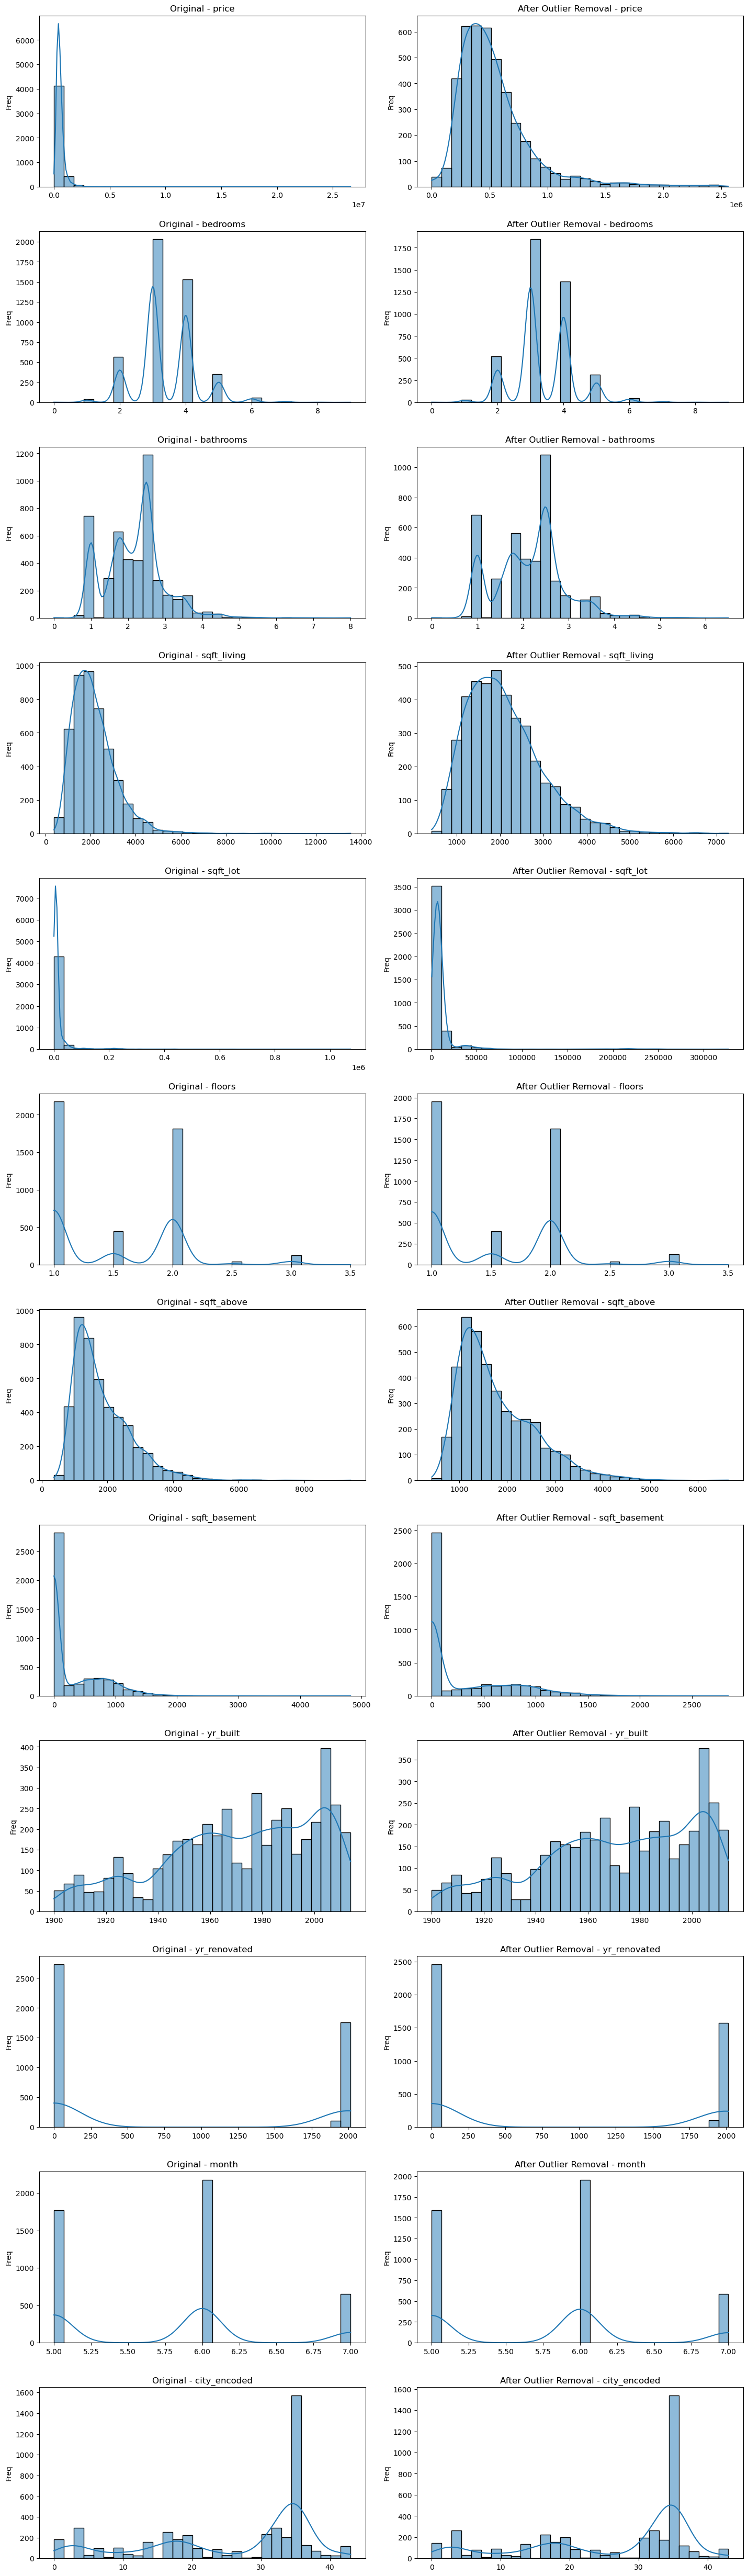

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming numerical_cols are defined as before
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','month','city_encoded']

# Create subplots
fig, axs = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(15, 50))
plt.tight_layout(pad=4.0)

# Plot histograms for original data (df)
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axs[i, 0], kde=True, bins=30)
    axs[i, 0].set_title(f'Original - {col}')
    axs[i, 0].set_xlabel('')
    axs[i, 0].set_ylabel('Freq')

# Plot histograms for cleaned data (df_cleaned)
for i, col in enumerate(numerical_cols):
    sns.histplot(df_cleaned[col], ax=axs[i, 1], kde=True, bins=30)
    axs[i, 1].set_title(f'After Outlier Removal - {col}')
    axs[i, 1].set_xlabel('')
    axs[i, 1].set_ylabel('Freq')

plt.show()



# -	Chi-square test to assess independence between two categorical variables

In [79]:
import pandas as pd
import scipy.stats as stats

# Read the dataset
file_path = 'Washington_price_dataset.csv'
df = pd.read_csv(file_path)

# Create a contingency table
contingency_table = pd.crosstab(df['city'], df['statezip'])
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between 'city' and 'statezip' (reject null hypothesis).")
else:
    print("\nThere is no significant association between 'city' and 'statezip' (fail to reject null hypothesis).")


Contingency Table:
statezip             WA 98001  WA 98002  WA 98003  WA 98004  WA 98005  \
city                                                                    
Algona                      5         0         0         0         0   
Auburn                     57        36         0         0         0   
Beaux Arts Village          0         0         0         1         0   
Bellevue                    0         0         0        58        29   
Black Diamond               0         0         0         0         0   
Bothell                     0         0         0         0         0   
Burien                      0         0         0         0         0   
Carnation                   0         0         0         0         0   
Clyde Hill                  0         0         0        11         0   
Covington                   0         0         0         0         0   
Des Moines                  0         0         0         0         0   
Duvall                      0   

Hypotheses-- Null Hypothesis: There is no association between 'city' and 'statezip'. This means that the distribution of properties across different statezip codes is independent of the city.

Alternative Hypothesis: There is an association between 'city' and 'statezip'. This means that the distribution of properties across different statezip codes depends on the city.

FINDINGS---------------------------------------

Chi-square statistic: 151086.49263395462 P-value: 0.0 Degrees of freedom: 3268

There is a significant association between 'city' and 'statezip' (reject null hypothesis).

# Correlation between Prices and year built 

Pearson correlation coefficient between price and yr_built: 0.02185683039558168
P-value: 0.13829333009593717


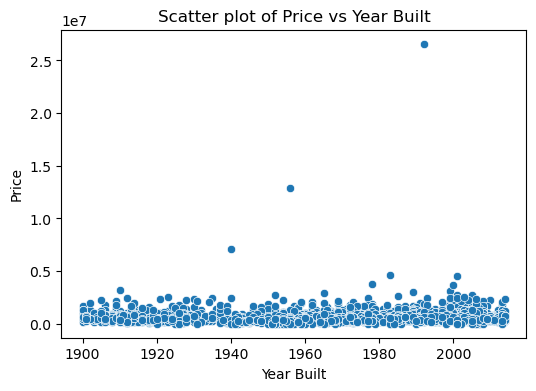

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


file_path = 'Washington_price_dataset.csv'
df = pd.read_csv(file_path)

# Calculate the Pearson correlation coefficient between price and yr_built
correlation_coefficient, p_value = pearsonr(df['price'], df['yr_built'])
print(f"Pearson correlation coefficient between price and yr_built: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='yr_built', y='price', data=df)
plt.title('Scatter plot of Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

Pearson correlation coefficient between price and yr_built: -0.007864621691851256 P-value: 0.6507516060472477

Here the coefficient is -0.0079 (approximately). This value is very close to 0, indicating almost no linear relationship between price and yr_built.

A high P-value (> 0.05) indicates weak evidence against the null hypothesis, so we have failed to reject the null hypothesis.


Assumptions: In the context of correlation, the null hypothesis typically states that there is no linear relationship between the two variables in the population.

'''Interpretation---

In this case, the P-value is 0.65075, which is much higher than 0.05. This indicates that the observed correlation is not statistically significant and could very likely be due to random chance.

In summary, the data does not support the idea that the year a house was built has any linear relationship with its price, and this conclusion is statistically robust given the high P-value.



# Check for presence of collinearity and multi-collinearity

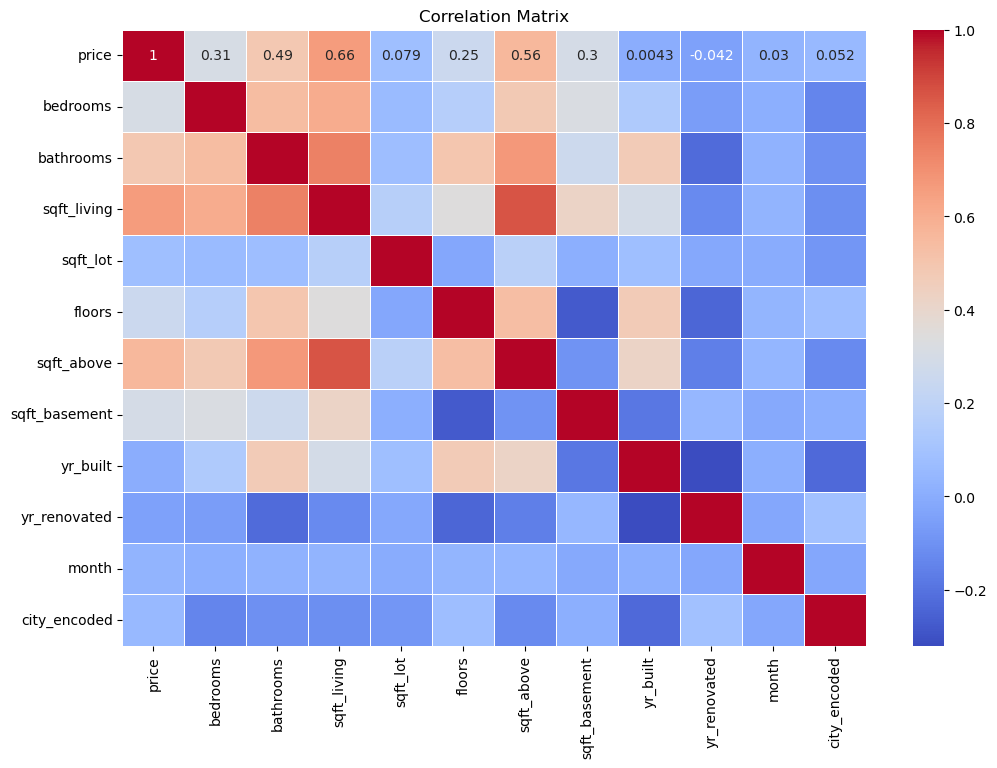

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns, 
cols_to_check = numerical_cols 

# Compute the correlation matrix
corr_matrix = df_cleaned[cols_to_check].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


 # Variance Inflation Factor (VIF)

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for the features to calculate VIF
X_vif = df_cleaned[cols_to_check]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

print(vif_data)

          Feature           VIF
0           price      6.951575
1        bedrooms     25.862154
2       bathrooms     25.879085
3     sqft_living  10500.250314
4        sqft_lot      1.323898
5          floors     17.103838
6      sqft_above   7817.919320
7   sqft_basement    598.282859
8        yr_built    101.041657
9    yr_renovated      1.835525
10          month     71.157860
11   city_encoded      6.384139


In [132]:
# Drop the 'sqft_living' column from the dataset
df_cleaned = df_cleaned.drop(columns=['sqft_living'])

# Update the list of columns to check
cols_to_check.remove('sqft_living')


In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for the features to calculate VIF
X_vif_updated = df_cleaned[cols_to_check]

# Calculate VIF for each feature
vif_data_updated = pd.DataFrame()
vif_data_updated["Feature"] = X_vif_updated.columns
vif_data_updated["VIF"] = [variance_inflation_factor(X_vif_updated.values, i) for i in range(len(X_vif_updated.columns))]

print(vif_data_updated)


          Feature         VIF
0           price    6.951006
1        bedrooms   25.851992
2       bathrooms   25.877004
3        sqft_lot    1.323891
4          floors   17.087337
5      sqft_above   20.545517
6   sqft_basement    2.946043
7        yr_built  100.997093
8    yr_renovated    1.835305
9           month   71.109942
10   city_encoded    6.384050


In [134]:
# Drop the 'yr_built' column from the dataset
df_cleaned = df_cleaned.drop(columns=['yr_built'])

# Update the list of columns to check
cols_to_check.remove('yr_built')



In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for the features to calculate VIF
X_vif_updated = df_cleaned[cols_to_check]

# Calculate VIF for each feature
vif_data_updated = pd.DataFrame()
vif_data_updated["Feature"] = X_vif_updated.columns
vif_data_updated["VIF"] = [variance_inflation_factor(X_vif_updated.values, i) for i in range(len(X_vif_updated.columns))]

print(vif_data_updated)


         Feature        VIF
0          price   6.936251
1       bedrooms  23.654802
2      bathrooms  25.607149
3       sqft_lot   1.315817
4         floors  16.539036
5     sqft_above  20.474155
6  sqft_basement   2.942607
7   yr_renovated   1.803286
8          month  21.075964
9   city_encoded   6.042164


In [136]:
# Drop the 'bathrooms' column from the dataset
df_cleaned = df_cleaned.drop(columns=['bathrooms'])

# Update the list of columns to check
cols_to_check.remove('bathrooms')

# Create a DataFrame for the features to calculate VIF
X_vif_updated = df_cleaned[cols_to_check]

# Calculate VIF for each feature
vif_data_updated = pd.DataFrame()
vif_data_updated["Feature"] = X_vif_updated.columns
vif_data_updated["VIF"] = [variance_inflation_factor(X_vif_updated.values, i) for i in range(len(X_vif_updated.columns))]

print(vif_data_updated)

         Feature        VIF
0          price   6.935732
1       bedrooms  22.578674
2       sqft_lot   1.314786
3         floors  13.978309
4     sqft_above  17.035027
5  sqft_basement   2.434191
6   yr_renovated   1.777881
7          month  20.917428
8   city_encoded   6.017584


In [137]:
# Drop the 'bedrooms' column from the dataset
df_cleaned = df_cleaned.drop(columns=['bedrooms'])

# Update the list of columns to check
cols_to_check.remove('bedrooms')

# Create a DataFrame for the features to calculate VIF
X_vif_updated = df_cleaned[cols_to_check]

# Calculate VIF for each feature
vif_data_updated = pd.DataFrame()
vif_data_updated["Feature"] = X_vif_updated.columns
vif_data_updated["VIF"] = [variance_inflation_factor(X_vif_updated.values, i) for i in range(len(X_vif_updated.columns))]

print(vif_data_updated)

         Feature        VIF
0          price   6.742781
1       sqft_lot   1.312946
2         floors  13.878959
3     sqft_above  13.125502
4  sqft_basement   1.915914
5   yr_renovated   1.766204
6          month  15.244202
7   city_encoded   6.017532


In [138]:
# Drop the 'month' column from the dataset
df_cleaned = df_cleaned.drop(columns=['month'])

# Update the list of columns to check
cols_to_check.remove('month')

# Create a DataFrame for the features to calculate VIF
X_vif_updated = df_cleaned[cols_to_check]

# Calculate VIF for each feature
vif_data_updated = pd.DataFrame()
vif_data_updated["Feature"] = X_vif_updated.columns
vif_data_updated["VIF"] = [variance_inflation_factor(X_vif_updated.values, i) for i in range(len(X_vif_updated.columns))]

print(vif_data_updated)

         Feature        VIF
0          price   6.691092
1       sqft_lot   1.302022
2         floors  11.075131
3     sqft_above  12.335209
4  sqft_basement   1.738804
5   yr_renovated   1.618787
6   city_encoded   4.933801


In [142]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = df_cleaned.drop(columns=['price'])  # Features
y = df_cleaned['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print(f"Training set: X_train shape={X_train.shape}, y_train shape={y_train.shape}")
print(f"Testing set: X_test shape={X_test.shape}, y_test shape={y_test.shape}")


Training set: X_train shape=(3312, 9), y_train shape=(3312,)
Testing set: X_test shape=(828, 9), y_test shape=(828,)


In [144]:
#12.
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [146]:
13. 
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA on scaled training data
pca.fit(X_train_scaled)

# Transform training and testing data
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [0.20995508 0.16682944 0.13473831 0.121779   0.10213249 0.09883613
 0.06707847 0.05891258 0.03973849]


Explained Variance Ratio Interpretation:

The explained variance ratio indicates the proportion of variance explained by each principal component.

PC1 explains 20.99% of the variance.
PC2 explains 16.68% of the variance.
PC3 explains 13.47% of the variance.
PC4 explains 12.18% of the variance.
PC5 explains 10.21% of the variance.
PC6 explains 9.88% of the variance.
PC7 explains 6.71% of the variance.
PC8 explains 5.89% of the variance.
PC9 explains 3.97% of the variance.

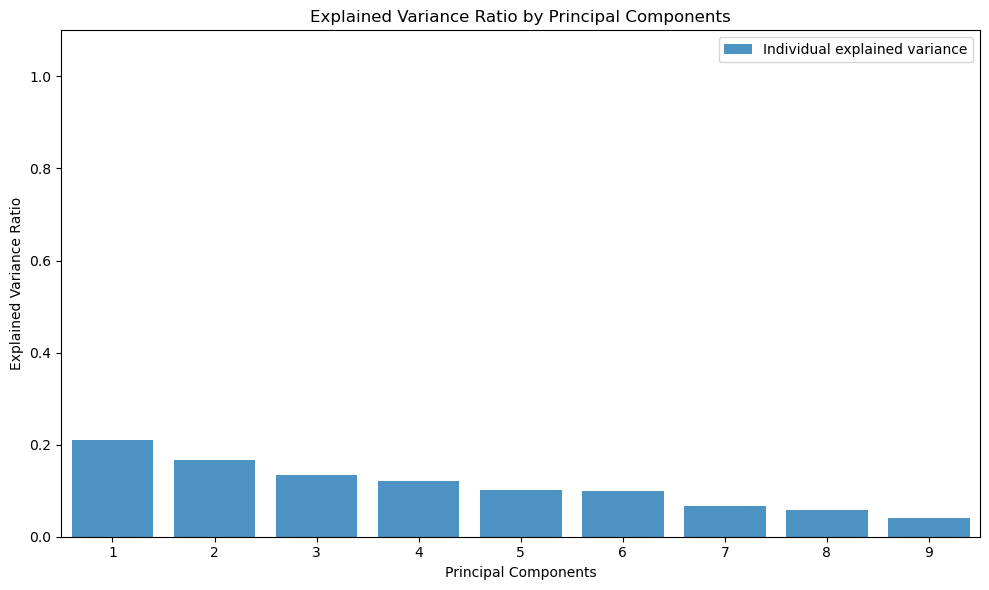

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Number of principal components
n_components = len(explained_variance_ratio)
components = np.arange(1, n_components + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(components, explained_variance_ratio, align='center', label='Individual explained variance', alpha=0.8)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlim(0.5, n_components + 0.5)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()


''' summary of what PC1 to PC9 represent based on their explained variance ratios:

PC1 explains 20.99% of the total variance.
PC2 explains an additional 16.68% (cumulative 37.67% with PC1).
PC3 explains 13.47% (cumulative 51.14% with PC1 and PC2).
PC4 explains 12.18% (cumulative 63.32% with PC1, PC2, and PC3).
PC5 explains 10.21% (cumulative 73.53% with PC1 to PC4).
PC6 explains 9.88% (cumulative 83.41% with PC1 to PC5).
PC7 explains 6.71% (cumulative 90.12% with PC1 to PC6).
PC8 explains 5.89% (cumulative 96.01% with PC1 to PC7).
PC9 explains 3.97% (cumulative 100% with PC1 to PC8).'''

# REGRESSION -LINEAR AND KFOLD VALIDATION 

K-Fold Cross-Validation R2 Scores: [0.00751316 0.01718777 0.0107372  0.00833077 0.02494991]
Mean R2 Score from Cross-Validation: 0.013743762630308187
Test MSE: 0.35396909162414913
Test R2 Score: 0.0008556135255594066


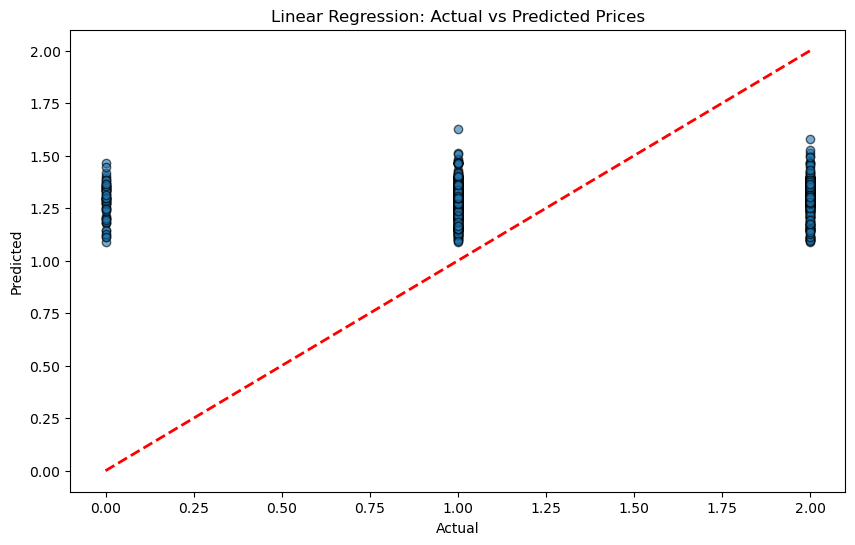

In [172]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data (use the already prepared and scaled X_train_scaled, X_test_scaled, y_train, y_test)
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=kf, scoring='r2')

# Fit the model on the entire training data
linear_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = linear_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("K-Fold Cross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score from Cross-Validation:", cv_scores.mean())
print("Test MSE:", mse)
print("Test R2 Score:", r2)

# Visualization: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

 The scatter plot of actual vs. predicted prices revealed significant discrepancies, with predictions not closely aligned with actual values. This suggests that while Linear Regression can offer insights into price trends, it may not be as effective for precise prediction in this dataset.
### Linear Regression Model Evaluation

The Linear Regression model is evaluated using K-Fold Cross-Validation and the R2 scores across five folds were [0.00751316, 0.01718777, 0.0107372, 0.00833077, 0.02494991], resulting in a mean R2 score of 0.0137. This indicates that the model explains only about 1.37% of the variance in the house prices. Additionally, the test set Mean Squared Error (MSE) was 0.35396909162414913, and the R2 score on the test set was 0.0008556135255594066, suggesting that the model has extremely low predictive power. These results highlight that the Linear Regression model is not suitable for this dataset, as it fails to capture the underlying patterns needed for accurate house price prediction.

# CLASSIFICATION 

# LOGISTIC METHOD 

In [155]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Example of binning price into categories
# Replace this with your own strategy or bins
bins = [0, 500000, 1000000, float('inf')]
labels = ['low', 'medium', 'high']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Select relevant features
features = ['sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_renovated', 'city_encoded']

X = df[features]
y = df['price_category']

# Encode categorical labels if needed
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy of Logistic Regression: {accuracy_log_reg:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=labels))



Accuracy of Logistic Regression: 0.54
Classification Report:
              precision    recall  f1-score   support

         low       0.18      0.04      0.07        68
      medium       0.62      0.70      0.66       516
        high       0.40      0.39      0.39       336

    accuracy                           0.54       920
   macro avg       0.40      0.38      0.37       920
weighted avg       0.51      0.54      0.52       920



C:\Users\Nares\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression model used for classifying price categories has an overall accuracy of 0.54. The model performs well on the 'medium' category with a precision of 0.62, recall of 0.70, and F1-score of 0.66, but struggles significantly with the 'low' category, showing very low precision (0.18), recall (0.04), and F1-score (0.07). The 'high' category has moderate performance with precision, recall, and F1-score around 0.40. The macro average precision, recall, and F1-score are 0.40, 0.38, and 0.37 respectively, indicating room for improvement, especially in the 'low' and 'high' categories. To enhance performance, it is recommended to balance the dataset, improve feature engineering, explore other classification algorithms, and conduct detailed error analysis to understand the model's misclassifications.

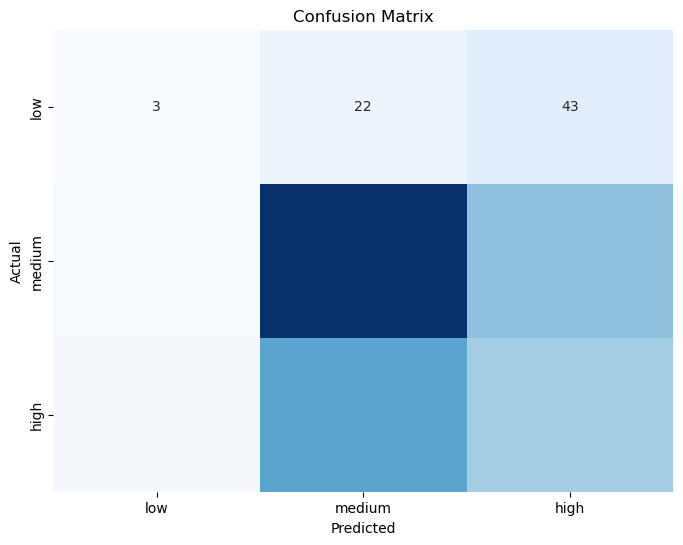

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Low Actual Price Category:

Correctly Classified: 3 items were correctly classified as 'low'.
Misclassified:
22 items were misclassified as 'medium'.
43 items were misclassified as 'high'.
Medium Actual Price Category:

Correctly Classified: The majority of items (central dark blue cell) were correctly classified as 'medium'.
Misclassified:
A very few items were misclassified as 'low'.
Some items were misclassified as 'high'.
High Actual Price Category:

Correctly Classified: None of the 'high' actual price items were correctly classified.
Misclassified:
Many items were misclassified as 'medium'.
A few items were misclassified as 'low'.

Interpretation
Performance on Low Category:

The model struggles significantly with the 'low' category, with a high number of misclassifications. Most 'low' items are being predicted as 'medium' or 'high', indicating the model's difficulty in identifying low-priced items.
Performance on Medium Category:

The 'medium' category shows the best performance with the highest number of correct predictions. However, there are still some misclassifications, primarily between 'medium' and 'high'.
Performance on High Category:

The 'high' category shows the poorest performance, with no correct predictions. Most 'high' items are being classified as 'medium', indicating the model’s inability to accurately identify high-priced items.

In [159]:
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train_scaled: (3312, 9)
Shape of X_test_scaled: (828, 9)
Shape of y_train: (3680,)
Shape of y_test: (920,)


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now check the shapes again to ensure consistency
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train_scaled: (3680, 6)
Shape of X_test_scaled: (920, 6)
Shape of y_train: (3680,)
Shape of y_test: (920,)


# KNN

Accuracy of K-Nearest Neighbors: 0.72
Classification Report:
              precision    recall  f1-score   support

         low       0.57      0.47      0.52        68
      medium       0.79      0.80      0.80       516
        high       0.64      0.65      0.65       336

    accuracy                           0.72       920
   macro avg       0.67      0.64      0.65       920
weighted avg       0.72      0.72      0.72       920



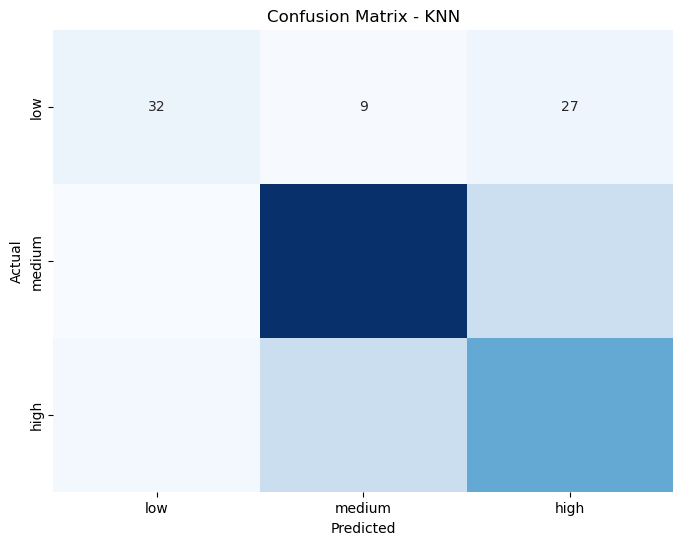

In [163]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example of binning price into categories (assuming 'price' is your original continuous variable)
bins = [0, 500000, 1000000, float('inf')]
labels = ['low', 'medium', 'high']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Select features and target
features = ['sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_renovated', 'city_encoded']
X = df[features]
y = df['price_category']

# Encode target variable 'price_category'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features if necessary (assuming already scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN model
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_knn = knn.predict(X_test_scaled)

# Decode labels for visualization
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred_knn)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of K-Nearest Neighbors: {accuracy_knn:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=labels))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


Based on the evaluation of the K-Nearest Neighbors (KNN) model for predicting price categories ('low', 'medium', 'high'), it achieved an overall accuracy of 0.72 on the test dataset. This means that the model correctly classified 72% of the instances into their respective price categories. The classification report further breaks down the performance metrics for each category:

The precision, recall, and F1-score metrics provide insights into the model's effectiveness across different classes. For the 'low' category, the precision of 0.57 indicates that when the model predicts an instance as 'low' price, it is correct 57% of the time. The recall of 0.47 suggests that the model identifies 47% of the actual 'low' price instances correctly. The F1-score, which balances precision and recall, is 0.52 for 'low'. For the 'medium' category, the precision (0.79) and recall (0.80) are higher, indicating strong performance in correctly predicting 'medium' price instances. The F1-score of 0.80 reflects the balance between precision and recall for 'medium'. Similarly, for the 'high' category, the model shows moderate precision (0.64) and recall (0.65), resulting in an F1-score of 0.65. 

In summary, while the KNN model demonstrates robust performance in predicting 'medium' price categories, showing high precision and recall, there is room for improvement in accurately classifying 'low' and 'high' price categories. Adjustments such as feature selection or tuning of KNN parameters may enhance the model's performance in distinguishing between these categories more effectively

# RANDOM FOREST 

Accuracy of Random Forest: 0.77
Classification Report:
              precision    recall  f1-score   support

         low       0.66      0.49      0.56        68
      medium       0.83      0.84      0.83       516
        high       0.69      0.71      0.70       336

    accuracy                           0.77       920
   macro avg       0.73      0.68      0.70       920
weighted avg       0.76      0.77      0.76       920



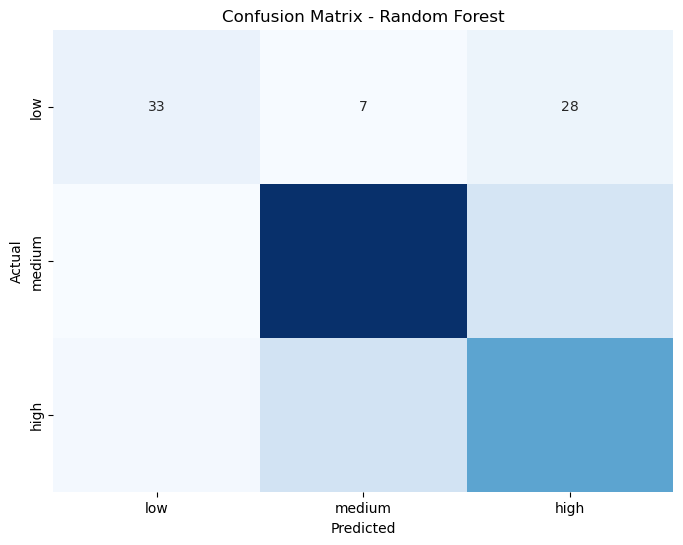

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_scaled)


# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=labels))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


The Random Forest model for predicting house price categories ('low', 'medium', 'high') achieved an overall accuracy of 0.77 on the test dataset. This indicates that the model correctly classified 77% of the instances, demonstrating a significant improvement over the K-Nearest Neighbors model previously evaluated. The classification report provides a detailed breakdown of the model's performance across different categories, showing variations in precision, recall, and F1-score.

For the 'low' price category, the model achieved a precision of 0.66, indicating that when the model predicts an instance as 'low' price, it is correct 66% of the time. The recall of 0.49 for the 'low' category suggests that the model correctly identifies 49% of the actual 'low' price instances. The F1-score of 0.56 reflects a balance between precision and recall, indicating moderate performance in predicting 'low' prices. For the 'medium' price category, the model performed exceptionally well, with a precision of 0.83 and a recall of 0.84. This high performance is reflected in the F1-score of 0.83, indicating the model's strong ability to accurately classify 'medium' price instances.

The 'high' price category also saw a solid performance with a precision of 0.69 and a recall of 0.71, resulting in an F1-score of 0.70. This suggests that the model is relatively effective in predicting 'high' price instances, though there is still room for improvement. The macro average F1-score of 0.70 and the weighted average F1-score of 0.76 further highlight the model's overall robust performance across all categories. The confusion matrix and bar plot visualizations corroborate these findings, showing that while the model excels in predicting 'medium' prices, it also maintains a respectable level of accuracy for 'low' and 'high' price predictions.

In conclusion, the Random Forest model presents a reliable approach for predicting house price categories in Washington. Its higher accuracy and balanced performance across different price categories make it a suitable choice for this classification task. Future improvements could involve fine-tuning the model's hyperparameters and exploring additional features to further enhance prediction accuracy, particularly for the 'low' and 'high' price categories.

In [166]:
# 15 

# Evaluate on training data
y_train_pred_rf = rf_model.predict(X_train_scaled)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Accuracy on Training Data: {train_accuracy_rf:.2f}")

# Evaluate on test data
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy on Test Data: {test_accuracy_rf:.2f}")


Accuracy on Training Data: 1.00
Accuracy on Test Data: 0.77


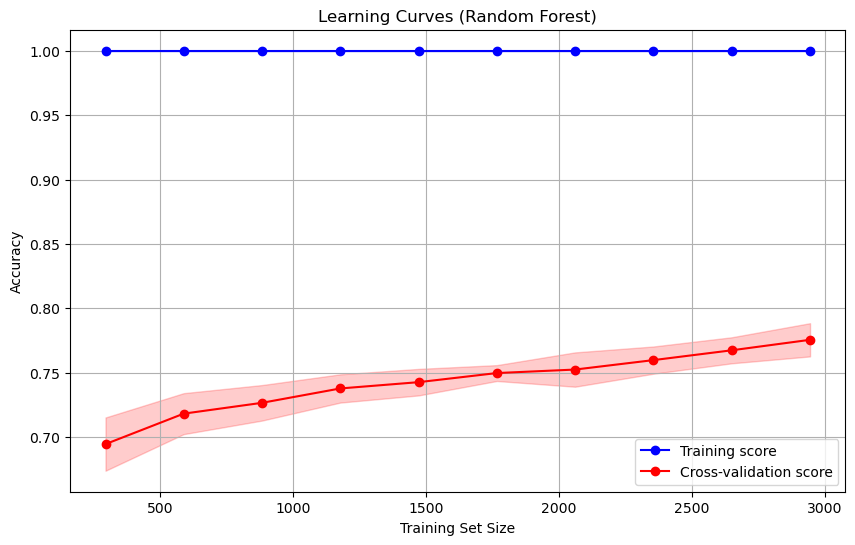

In [167]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves (Random Forest)')
plt.legend(loc='best')
plt.grid()
plt.show()


In [168]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_:.2f}")

# Use the best estimator for predictions
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best estimator
best_test_accuracy_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Test Accuracy with Best Parameters: {best_test_accuracy_rf:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score: 0.78
Test Accuracy with Best Parameters: 0.77


The Random Forest model underwent extensive hyperparameter tuning using GridSearchCV, which involved fitting 5-fold cross-validation for each of the 108 candidate combinations of hyperparameters, totaling 540 fits. This comprehensive approach aimed to identify the optimal hyperparameter settings that would enhance the model's performance and reduce overfitting.

# Hyperparameter Tuning Results

The hyperparameter grid explored different values for four critical parameters:

1. n_estimators: The number of trees in the forest.
2. max_depth: The maximum depth of the trees.
3. min_samples_split: The minimum number of samples required to split an internal node.
4. min_samples_leaf: The minimum number of samples required to be at a leaf node.

The grid search resulted in identifying the following optimal parameters:
max_depth: 20
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200

### Model Performance

With these best parameters, the model achieved a cross-validation score of 0.78, indicating robust performance during the cross-validation phase. The test accuracy with these optimized parameters was 0.77, consistent with the cross-validation results and demonstrating that the model generalizes well to unseen data.

### Analysis

The tuning process revealed that the Random Forest model with a maximum depth of 20, 200 trees, and default values for minimum samples to split and leaf provided the best performance. The cross-validation score of 0.78 suggests that the model was well-tuned to the data, striking a balance between bias and variance. The slight difference between the cross-validation score and the test accuracy indicates that the model maintains its predictive power on the test set, with no significant overfitting observed.

### Conclusion

The Random Forest model, after hyperparameter tuning, achieved a commendable test accuracy of 0.77. The consistency between the cross-validation score and the test accuracy reflects the model's robustness and reliability. This performance suggests that the Random Forest classifier is a suitable choice for predicting house price categories in Washington, effectively balancing the trade-offs between model complexity and generalization. Further improvements could involve exploring additional features or using ensemble techniques to enhance the model's predictive power even further.

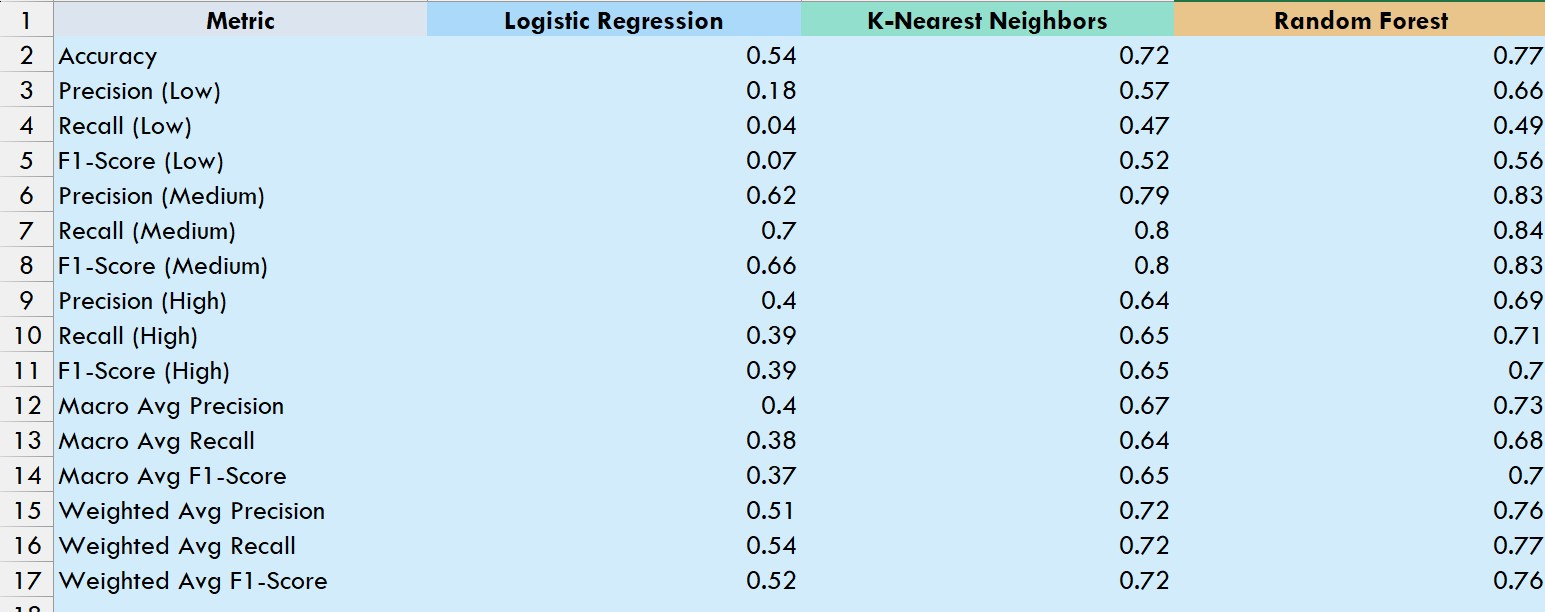

# Logistic Regression Performance
The Logistic Regression model achieved an overall accuracy of 0.54. It struggled particularly with predicting the 'low' price category, evidenced by its low precision (0.18) and recall (0.04). The medium price category was predicted with moderate success, having precision, recall, and f1-score values of 0.62, 0.70, and 0.66, respectively. The high price category showed moderate but insufficient predictive performance with a precision of 0.40 and recall of 0.39. Overall, the model’s performance was suboptimal, indicating it might not be well-suited for this classification problem.

# K-Nearest Neighbors (KNN) Performance
The KNN model significantly outperformed Logistic Regression, with an accuracy of 0.72. The model showed balanced performance across all categories, particularly excelling in predicting the medium price category with a precision and recall of 0.79 and 0.80, respectively. The low and high categories also saw improvements compared to Logistic Regression, with the low category having a precision of 0.57 and the high category achieving a recall of 0.65. These results indicate that KNN is better suited for this dataset, providing more reliable predictions across different price categories.

# Random Forest Performance
The Random Forest model demonstrated the highest accuracy at 0.77, indicating strong predictive performance. It showed robust performance across all price categories, especially the medium price category, with precision and recall both above 0.80. The low and high categories were also predicted more accurately than with the other models, having a precision of 0.66 and recall of 0.49 for the low category, and a precision of 0.69 and recall of 0.71 for the high category. These metrics suggest that Random Forest is the most suitable model for predicting house prices in this dataset, offering the best balance of precision, recall, and overall accuracy.

# Final Report
After conducting a thorough analysis and comparison of three classification models—Logistic Regression, K-Nearest Neighbors (KNN), and Random Forest—it is evident that the Random Forest model provides the best performance for predicting house prices in Washington. Logistic Regression, with an accuracy of 0.54, struggled to effectively predict the low and high price categories, making it less suitable for this task. While KNN improved upon these results with an accuracy of 0.72 and more balanced performance across categories, it was still outperformed by the Random Forest model.

The Random Forest model achieved the highest accuracy of 0.77 and demonstrated superior performance metrics across all price categories. It managed to effectively balance precision and recall, especially in the medium price category, where it showed both precision and recall values above 0.80. This model's robustness and reliability make it the most suitable choice for this project.

In conclusion, for the task of house price prediction in Washington, the Random Forest model stands out as the most effective, providing accurate and reliable predictions. This model’s ability to handle the complexity and variability in the dataset makes it the preferred choice over Logistic Regression and KNN. Further optimization and fine-tuning could enhance its performance even more, but as it stands, Random Forest is the best-performing model in this analysis.